# Topic 2 -- Logistic Regression

Welcome to topic 2 of the Beginner AI Course! In this notebook, we are going to explore the **classification** problem in supervised learning, how **logistic regression** triumphs over **linear regression** in this area, as well as see logistic regression in action predicting the types of Pokemon!

## Table of Contents
1. [Installing Dependencies](#installing)


2. [Linear Regression vs Classification](#linregfail)


3. [Logistic Regression](#logreg)
    - [Sigmoid Activation Function](#sigmoid)
    - [Cost Function](#cost)
    - [Putting it all together](#putting)
   
   
4. [Binary Classification](#binary)
    - [Pokemon Classification Problem](#pokemon)
    - [Choosing our Features](#choosing)
    - [Imbalanced Classes](#imbalanced)
    - [Training our Logistic Regression Model](#training1)
    - [Confusion Matrix](#conf)
    - [Observations](#obs1)
    
    
5. [Multi-Class Classification](#multi)
    - [One vs All](#onevall)
    - [One-Hot Encoding](#onehot)
    - [Choosing our Features](#choosingf)
    - [Choosing our Labels](#choosingl)
    - [Training a Multi-Class Classifier](#train_m)
    - [Observations](#obs2)

## Installing Dependencies <a name="installing">

Lets first install the dependencies needed for this demo. Here are a list of the dependencies and descriptions on what they are for:

- **Numpy**: Powerful linear regression library
- **Pandas**: Used for data visualization and organization
- **SciKitLearn**: Maching learning library containing the `LogisticRegression` class
- **Bokeh**, **MatPlotLib**, and  **SeaBorn**: Plots and Graphs for visualizing the data
- **disp_utils**: A custom module for displaying the demo visuals

In [1]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
import matplotlib.pyplot as plt
import seaborn as sn
from disp_utils import *

pd.set_option('display.max_columns', None)

## Linear Regression vs Classification <a name="linregfail">

Lets set the scene: you are trying to train a machine learning model that will predict whether you get admitted into the **NBA** based on your **height**. Notice that this is a classification problem, as there are two discrete values that the model is allowed to output: Either **yes**, you get admitted, or **no**, you are rejected. We will denote $\hat{y}$ as the output, and it could only take on **1 or 0**, 1 being yes and 0 being no. Lets display a plot of what a hypothetical dataset would look like:

In [2]:
display_height_dataset()

Loading BokehJS ...

Here, we can see that at around 1.8m, you will be admitted into the NBA. After running linear regression, we are able to fit a linear hypothesis function to the data:

In [3]:
display_height_line1()

Loading BokehJS ...

One thing to note is that the linear hypothesis function is not discrete, which is okay, because we can assign the output value of the function as a **probability** that you will be admitted given your height. For example, if you are 1.6 metres tall, there is roughly a 10% probability that you will be admitted, whereas if you are 2 meters tall, there is a 90% probability you will be admitted. We will use this probability metric to make a cut-off: **all probabilities greater or equal to 50% we will predict $\hat{y} = 1$, and all probabilities less than 50% we will predict $\hat{y} = 0$.** 

However, there are a few problems to discuss: if your height is less than 1.55 metres, then your probability of getting admitted is less than 0%, and if your height is over 2.05 metres, your probability is greater than 100%. Furthermore, lets say we add some **outliers**; lets add the height of 1.0 metres to our dataset:

In [4]:
display_height_line2()

Loading BokehJS ...

Here, we can see that adding an outlier has significantly shifted the **decision boundary**. Before, a height of 1.8 meters and above will have a high likelyhood of getting admitted, whereas now, with the introduction of one datapoint, the acceptable height has decreased to 1.67m.

**Therefore, Linear Regression cannot be used for classification problems.**

## Logistic Regression <a name="logreg">

Despite the name "regression", logistic regression is an algorithm used for classification problems. The base concept is **very similar to linear regression**; you still have a linear feed forward step. This time I will use the letter $z$ to denote the linear output:

<div style="text-align: center">
    <div>
    &nbsp;
    </div>
 $z = wx + b$
</div>

### Sigmoid Activation Function <a name="sigmoid">
Now, however, we input the linear results into the **sigmoid function**. The sigmoid function is one type of **activation function** that bounds the output between 0 and 1, which eliminates probabilities of greater than 1 or less than 0. Also, using the sigmoid activation function ensures that the **decision boundary** would not get shifted due to **outliers**. 
    
The sigmoid function is represented by the formula down below:

<div style="text-align: center">
    <div>
    &nbsp;
    </div>
 $\begin{align}\sigma(z) = {1\over 1 + e^{-z}}\end{align}$
</div>
    
To visualize the sigmoid function, lets create a sigmoid function down below:

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
display_func(sigmoid)

Loading BokehJS ...

### Cost Function <a name="cost">
    
Previously, we learned that Linear Regression uses the **Mean Squared Error (MSE)** cost function to measure the error in the fit. While MSE works great for linear regression, it does not work very well for logistic regression. This is because due to the **sigmoid function** used in logistic regression, the resulting cost function is **non-convex**. Take a look at the figures below showing the non-convex nature of MSE used with the sigmoid function:

In [7]:
disp_convex()

Loading BokehJS ...

Non-convex functions can be problematic to **gradient descent**. To make the cost convex, we need a different cost function:

<div style="text-align: center">
    <div>
    &nbsp;
    </div>
 $\begin{align}C(w, b) = {1\over m} \sum\limits_{i=1}^m -y^{(i)}\log(a^{(i)})-(1-y^{(i)})\log(1-a^{(i)})\end{align}$
</div>

This cost function is called **Binary Cross Entropy (BCE)**, and is the cost function of choice for logistic regression. This cost function is guaranteed to be convex when used with the **sigmoid activation function**.

### Putting it all together <a name="putting">

All in all, how logistic regression learns is very similar to linear regression, other than the activation function and the cost function. Here's a summary of how it all works, shown in **pseudo-code**:

<div style="text-align: center">
    <div>
    &nbsp;
    </div>
</div>


```python
# Linear Regression:
for i in range(iterations):
    prediction = w*x + b
    
    cost = MSE_cost_function(prediction, label)
    slopes = cost.get_slopes()
    update(w, b).with(slopes)
    
# Logistic Regression:
for i in range(iterations):
    z = w*x + b
    prediction = sigmoid(z)
    
    cost = BCE_cost_function(prediction, label)
    slopes = cost.get_slopes()
    update(w, b).with(slopes)
```
    

[https://www.desmos.com/calculator/z4petl2oxa](https://www.desmos.com/calculator/z4petl2oxa)
    
[https://www.geogebra.org/3d/yku5x5tf](https://www.geogebra.org/3d/yku5x5tf)
    
---

## Binary Classification <a name="binary">
    
Binary Classification, as the name suggests, predicts on an output space of **two** states. An example of which is NBA Admittance, where the two possible states are either **yes** or **no**. This is the most basic form of logistic regression, and is the basis of more advanced forms of logistic regression.
    
### Pokemon Classification Problem <a name="pokemon">
Lets say we were to build a classifier to classify whether or not a Pokemon is **legendary** or not. This is a perfect example of binary classification. Let's load in the `pokemon.csv` file, which we will use for the rest of this notebook.

In [8]:
dataset = pd.read_csv('datasets/pokemon.csv')
dataset

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Taking a look at the dataset, notice that the rows are **truncated**. We can see the first few examples, as well as the last. Looking at the `is_legendary` column, we notice that all of the legendary pokemons are arranged at the bottom of our dataset. In order get a **uniform distribution** of either class in the training and testing sets, we need to **shuffle** our dataframe.

In [9]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Battle Armor', 'Swift Swim']",1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.5,0.50,1.00,2.0,2.0,2.0,95,7680,70,355,45,Old Shrimp Pokémon,50,600000,0.7,45,Anopthアノプス,Anorith,88.1,347,40,50,75,rock,bug,12.5,3,0
1,['Serene Grace'],1.00,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,0.50,2.0,0.5,0.5,0.00,0.25,0.5,0.5,1.0,100,30720,100,600,3,Wish Pokémon,100,1250000,0.3,100,Jirachiジラーチ,Jirachi,NaN,385,100,100,100,steel,psychic,1.1,3,1
2,"['Rock Head', 'Overcoat']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.50,1.0,2.0,1.0,1.00,1.00,1.0,1.0,0.5,95,10240,35,420,45,Endurance Pokémon,100,1250000,1.1,65,Komoruuコモルー,Shelgon,50.0,372,60,50,50,dragon,NaN,110.5,3,0
3,['Shadow Shield'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,1.00,1.0,1.0,0.0,0.50,0.50,1.0,1.0,1.0,113,30720,0,680,45,Moone Pokémon,89,1250000,4.0,137,Lunalaルナアーラ,Lunala,NaN,792,137,107,97,psychic,ghost,120.0,7,1
4,"['Snow Warning', 'Soundproof']",2.00,1.0,1.0,0.5,1.0,2.0,4.0,2.0,1.0,0.50,0.5,1.0,1.0,2.00,1.00,2.0,2.0,0.5,62,5120,70,334,120,Frosted Tree Pokémon,50,1250000,1.0,60,Yukikaburiユキカブリ,Snover,50.0,459,62,60,40,grass,ice,50.5,4,0
5,"['Natural Cure', 'Cloud Nine']",0.50,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.00,1.00,2.0,1.0,1.0,40,5120,70,310,255,Cotton Bird Pokémon,60,600000,0.4,45,Tylttoチルット,Swablu,50.0,333,40,75,50,normal,flying,1.2,3,0
6,"['Chlorophyll', 'Gluttony']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5,90,5120,70,390,120,Flycatcher Pokémon,50,1059860,1.0,65,Utsudonウツドン,Weepinbell,50.0,70,85,45,55,grass,poison,6.4,1,0
7,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,0.50,2.0,1.0,0.0,0.25,2.00,1.0,1.0,1.0,50,5120,70,405,90,Gas Pokémon,45,1059860,1.6,45,Ghostゴースト,Haunter,50.0,93,115,55,95,ghost,poison,0.1,1,0
8,['Levitate'],0.50,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.50,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,65,5120,70,340,190,Poison Gas Pokémon,95,1000000,0.6,40,Dogarsドガース,Koffing,50.0,109,60,45,35,poison,NaN,1.0,1,0
9,"['Blaze', 'Iron Fist']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,0.50,2.0,0.5,1.0,1.00,2.00,1.0,0.5,2.0,78,5120,70,405,45,Playful Pokémon,52,1059860,0.9,64,Moukazaruモウカザル,Monferno,88.1,391,78,52,81,fire,fighting,22.0,4,0


### Choosing our Features <a name="choosing">
    
Taking a look at the dataset, there are quite a few features that we can include into our training and testing sets. However, we probably do not need to include all of the features, as many features are redundant. Since we are training a classifier to classify whether or not a Pokemon is **legendary**, we can possibly choose the features `sp_attack`, `sp_defense`, and `weight_kg`.

In [10]:
features = dataset[['sp_attack', 'sp_defense', 'weight_kg']].to_numpy()
labels = dataset['is_legendary'].to_numpy()

print(f"features shape: {features.shape}")
print(f"labels shape: {labels.shape}")

features shape: (801, 3)
labels shape: (801,)


### Imbalanced Classes <a name="imbalanced">

#### *Intuition*

> *Suppose you were training a classifier for predicting whether a person owns a mansion or not. You gather together a dataset of 100 examples, containing features such as income, occupation, etc. In your dataset, 99 people do not own mansions, and 1 person owns a mansion. You train a classifier, and is impressed by the __98.5%__ accuracy that you obtained! However, I come in and present a model that performs better than yours! I achieved 99% accuracy by __predicting all zeros__. It might get that one instance wrong, but the other 99 instances it is correct.*

Sometimes in the real world, it is **not feasible** to get data with **perfectly balanced classes**. When the classes are not balanced, you will often train models that will be **biased** towards the more frequent class and simply not predict on the less frequent class. Here, we print the number of legendary Pokemons and the number of non-legendary Pokemons.

In [11]:
# calculates the number of legendary pokemon
num_legendaries = np.sum(dataset['is_legendary'].to_numpy())
# total pokemon
total_pokemon = dataset.shape[0]

print(f"number of legendary pokemon: {num_legendaries}")
print(f"number of non-legendary pokemon: {total_pokemon - num_legendaries}")

number of legendary pokemon: 70
number of non-legendary pokemon: 731


The classes in this case are quite **skewed** towards the non-legendary Pokemons in this case. We will resolve that when setting up the logistic regression model.

### Training our Logistic Regression Model <a name="training1">

Training the Logistic Regression model is quite similar to training a Linear Regression model as we have seen before. This time, we are going to use the `LogisticRegressionCV`class instead of the `LinearRegression` class.


In [12]:
from sklearn.model_selection import train_test_split

# converts all NaN to 0
features = np.nan_to_num(features, nan=0)

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1)

Remember the unbalanced classes mentioned above? Here, we are going to pass in the parameter `class_weight='balanced'` into the `LogisticRegressionCV` class, which would automatically balance out the classes by **emphasizing the importance of the less frequent class**.

In [13]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score

logreg = LogisticRegressionCV(max_iter=3000, class_weight='balanced', verbose=5, n_jobs=-1)
poly = PolynomialFeatures(degree=3)


X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)
Y_train_p = Y_train
Y_test_p = Y_test

print(f"X_train_p shape: {X_train_p.shape}")
print(f"Y_train_p shape: {Y_train_p.shape}")
print(f"X_test_p shape: {X_test_p.shape}")
print(f"Y_test_p shape: {Y_test_p.shape}")


X_train_p shape: (720, 20)
Y_train_p shape: (720,)
X_test_p shape: (81, 20)
Y_test_p shape: (81,)


In [14]:
logreg.fit(X_train_p, Y_train_p)

print(f"Accuracy: {logreg.score(X_test_p, Y_test_p)}")

Y_pred_p = logreg.predict(X_test_p)

print(f"F1 Score: {f1_score(Y_test_p, Y_pred_p)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


Accuracy: 0.9012345679012346
F1 Score: 0.5


### Confusion Matrix <a name="conf">

Often times in classification scenarios, we will evaluate our models by running on the test set and plotting a **confusion matrix**. The **confusion matrix** shows the **ground truth** values on the **horizontal axis** as well as the **predicted values** on the **vertical axis**. The resulting grid then displays frequency of the outcomes of prediction -- whether the label was `True` and the model predicted `False`, or any combination of label values vs prediction values.

<AxesSubplot:>

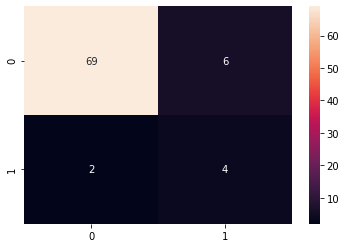

In [15]:
from sklearn.metrics import confusion_matrix

Y_pred = logreg.predict(X_test_p)
Y_true = Y_test_p

conf_mat = pd.DataFrame(confusion_matrix(Y_true, Y_pred, labels=[0, 1]))
sn.heatmap(conf_mat, annot=True)


### Observations <a name="obs1">

Here we see that we obtained an **Accuracy** of around 90%, and an F1 Score of 60%. Notice how we are using these two metrics instead of $R^2$, which was used in linear regression. The accuracy metric measures the number of correct predictions vs the total predictions, and the F1 Score is a combination of precision and recall. Furthermore, the confusion matrix gives us a sense of what actually happened with all the predictions. Let's fill out the observations table down below:


| Model | Observations | Accuracy | F1 |
|:----- |:------------| :--------| :--- |
|Logistic Regression (Binary) | Fairly high accuracy, many false positives in the confusion matrix | 90% | 60% |
    
---

## Multi-Class Classification <a name="multi">

Most of the classification problems nowadays deal with predicting across multiple classes. For example, *is this a picture of a cat, dog, bird, or horse?* One naive way of performing multi-class classification is to assign integer labels to each class:
    
    - cat: 0
    - dog: 1
    - bird: 2
    - horse: 3

This however becomes a **regression problem** -- rather, a **poorly performing** one at best. There must be another way of labelling our data.
    
### One vs All <a name="onevall">

Consider training 4 Binary Classifiers: the first one predicts on whether it is a picture of a cat or not, the second one predicts whether it is a picture of a dog or not, and so on. This is called **One vs All** classification -- for each classifier, you are setting one class as the output $\hat{y} = 1$, and the rest of the classes as $\hat{y} = 0$.
    
This affirms the idea mentioned above that *Binary Classification forms the basis of more advanced classification methods [multi-class]*. Each class is effectively governed by its own binary classifier, and the final prediction is decided by which ever classifier outputs the **largest value**.
    
### One-Hot Encoding <a name="onehot">
    
When training a multi-class model, since you are effectively training multiple classifiers, each classifier needs an output label. These labels can be stored into an `np.array` as shown:
    
```python
    
# Individual examples
cat = np.array([[1, 0, 0, 0]])
dog = np.array([[0, 1, 0, 0]])
bird = np.array([[0, 0, 1, 0]])
horse = np.array([[0, 0, 0, 1]])
    
# Labels set
Y_train = np.array([
    [1 ,0, 0, 0],  # cat
    [0, 0, 1, 0],  # bird
    [0, 1, 0, 0]   # dog
    ...
])
```
    
This is called **One-Hot Encoding**, where the true class is labeled with a 1, and everywhere else is labeled with a 0.
    
### Choosing our Features <a name="choosingf">
    
We are going to train a Multi-class Logistic Regression Classifier to predict whether the pokemon is **Fire, Water, Grass, or None of the Above (NA)**. First, we will print out the `dataset` to give ourselves a little refresher.

In [16]:
dataset.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Battle Armor', 'Swift Swim']",1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.5,0.50,1.00,2.0,2.0,2.0,95,7680,70,355,45,Old Shrimp Pokémon,50,600000,0.7,45,Anopthアノプス,Anorith,88.1,347,40,50,75,rock,bug,12.5,3,0
1,['Serene Grace'],1.00,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,0.50,2.0,0.5,0.5,0.00,0.25,0.5,0.5,1.0,100,30720,100,600,3,Wish Pokémon,100,1250000,0.3,100,Jirachiジラーチ,Jirachi,NaN,385,100,100,100,steel,psychic,1.1,3,1
2,"['Rock Head', 'Overcoat']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.50,1.0,2.0,1.0,1.00,1.00,1.0,1.0,0.5,95,10240,35,420,45,Endurance Pokémon,100,1250000,1.1,65,Komoruuコモルー,Shelgon,50.0,372,60,50,50,dragon,NaN,110.5,3,0
3,['Shadow Shield'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,1.00,1.0,1.0,0.0,0.50,0.50,1.0,1.0,1.0,113,30720,0,680,45,Moone Pokémon,89,1250000,4.0,137,Lunalaルナアーラ,Lunala,NaN,792,137,107,97,psychic,ghost,120.0,7,1
4,"['Snow Warning', 'Soundproof']",2.00,1.0,1.0,0.5,1.0,2.0,4.0,2.0,1.0,0.50,0.5,1.0,1.0,2.00,1.00,2.0,2.0,0.5,62,5120,70,334,120,Frosted Tree Pokémon,50,1250000,1.0,60,Yukikaburiユキカブリ,Snover,50.0,459,62,60,40,grass,ice,50.5,4,0
5,"['Natural Cure', 'Cloud Nine']",0.50,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.00,1.00,2.0,1.0,1.0,40,5120,70,310,255,Cotton Bird Pokémon,60,600000,0.4,45,Tylttoチルット,Swablu,50.0,333,40,75,50,normal,flying,1.2,3,0
6,"['Chlorophyll', 'Gluttony']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5,90,5120,70,390,120,Flycatcher Pokémon,50,1059860,1.0,65,Utsudonウツドン,Weepinbell,50.0,70,85,45,55,grass,poison,6.4,1,0
7,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,0.50,2.0,1.0,0.0,0.25,2.00,1.0,1.0,1.0,50,5120,70,405,90,Gas Pokémon,45,1059860,1.6,45,Ghostゴースト,Haunter,50.0,93,115,55,95,ghost,poison,0.1,1,0
8,['Levitate'],0.50,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.50,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,65,5120,70,340,190,Poison Gas Pokémon,95,1000000,0.6,40,Dogarsドガース,Koffing,50.0,109,60,45,35,poison,NaN,1.0,1,0
9,"['Blaze', 'Iron Fist']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,0.50,2.0,0.5,1.0,1.00,2.00,1.0,0.5,2.0,78,5120,70,405,45,Playful Pokémon,52,1059860,0.9,64,Moukazaruモウカザル,Monferno,88.1,391,78,52,81,fire,fighting,22.0,4,0


One thing to ask ourselves when choosing features is *What features are possibly related to the problem?* After all, using `weight_kg` as a feature to predict the type of pokemon is probably not the best idea. Here, we will choose the features that tell us how well a Pokemon of a certain type does **against another type**. For example, an **Ice** type Pokemon might do very well against **Fire**, but not so well against other **Ice** types.

In [17]:
input_features = list(dataset.columns[1:19])
print(input_features, '\n')
features_m = dataset[input_features].to_numpy()

print(f"features_m shape: {features_m.shape}")

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water'] 

features_m shape: (801, 18)


### Choosing our Labels <a name="choosingl">
    
For this classification problem, we want to make **One-Hot encodings** of the types `"Fire", "Water", "Grass", "NA"`. Looking at the `dataset`, we can see the `type1` column containing the primary types of the Pokemon. These are currently stored as datatype `string`, however we want to convert them to integers. `pd.get_dummies()` is a function that will create One-Hot encoding of all the different values of strings it sees in a column and store it as a spearate dataset.

In [18]:
type1_dummies = pd.get_dummies(dataset[['type1']])
type1_dummies 

,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


From the 18 columns in `type1_dummies`, we will only need 3 columns. These three columns (`"type1_fire, type1_water, type1_grass"`) are stored back into `dataset` as new columns. The `"NA"` column is created via the logic of `not("Fire" or "Water" or "Grass")`.

In [19]:
dataset['fire'] = type1_dummies['type1_fire']
dataset['water'] = type1_dummies['type1_water']
dataset['grass'] = type1_dummies['type1_grass']
dataset['NA'] = ~(type1_dummies['type1_fire'] | type1_dummies['type1_water'] | type1_dummies['type1_grass']) - 254
dataset.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,fire,water,grass,NA
0,"['Battle Armor', 'Swift Swim']",1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.5,0.50,1.00,2.0,2.0,2.0,95,7680,70,355,45,Old Shrimp Pokémon,50,600000,0.7,45,Anopthアノプス,Anorith,88.1,347,40,50,75,rock,bug,12.5,3,0,0,0,0,1
1,['Serene Grace'],1.00,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,0.50,2.0,0.5,0.5,0.00,0.25,0.5,0.5,1.0,100,30720,100,600,3,Wish Pokémon,100,1250000,0.3,100,Jirachiジラーチ,Jirachi,NaN,385,100,100,100,steel,psychic,1.1,3,1,0,0,0,1
2,"['Rock Head', 'Overcoat']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.50,1.0,2.0,1.0,1.00,1.00,1.0,1.0,0.5,95,10240,35,420,45,Endurance Pokémon,100,1250000,1.1,65,Komoruuコモルー,Shelgon,50.0,372,60,50,50,dragon,NaN,110.5,3,0,0,0,0,1
3,['Shadow Shield'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,1.00,1.0,1.0,0.0,0.50,0.50,1.0,1.0,1.0,113,30720,0,680,45,Moone Pokémon,89,1250000,4.0,137,Lunalaルナアーラ,Lunala,NaN,792,137,107,97,psychic,ghost,120.0,7,1,0,0,0,1
4,"['Snow Warning', 'Soundproof']",2.00,1.0,1.0,0.5,1.0,2.0,4.0,2.0,1.0,0.50,0.5,1.0,1.0,2.00,1.00,2.0,2.0,0.5,62,5120,70,334,120,Frosted Tree Pokémon,50,1250000,1.0,60,Yukikaburiユキカブリ,Snover,50.0,459,62,60,40,grass,ice,50.5,4,0,0,0,1,0
5,"['Natural Cure', 'Cloud Nine']",0.50,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.00,1.00,2.0,1.0,1.0,40,5120,70,310,255,Cotton Bird Pokémon,60,600000,0.4,45,Tylttoチルット,Swablu,50.0,333,40,75,50,normal,flying,1.2,3,0,0,0,0,1
6,"['Chlorophyll', 'Gluttony']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5,90,5120,70,390,120,Flycatcher Pokémon,50,1059860,1.0,65,Utsudonウツドン,Weepinbell,50.0,70,85,45,55,grass,poison,6.4,1,0,0,0,1,0
7,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,0.50,2.0,1.0,0.0,0.25,2.00,1.0,1.0,1.0,50,5120,70,405,90,Gas Pokémon,45,1059860,1.6,45,Ghostゴースト,Haunter,50.0,93,115,55,95,ghost,poison,0.1,1,0,0,0,0,1
8,['Levitate'],0.50,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.50,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,65,5120,70,340,190,Poison Gas Pokémon,95,1000000,0.6,40,Dogarsドガース,Koffing,50.0,109,60,45,35,poison,NaN,1.0,1,0,0,0,0,1
9,"['Blaze', 'Iron Fist']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,0.50,2.0,0.5,1.0,1.00,2.00,1.0,0.5,2.0,78,5120,70,405,45,Playful Pokémon,52,1059860,0.9,64,Moukazaruモウカザル,Monferno,88.1,391,78,52,81,fire,fighting,22.0,4,0,1,0,0,0


In [20]:
labels_m = dataset[['fire', 'water', 'grass', 'NA']].to_numpy()
print(f"labels_m shape: {labels_m.shape}")

labels_m shape: (801, 4)


In [21]:
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(features_m, labels_m, test_size=0.1)

### Training the Multi-Class Classifier <a name="train_m">

Remember how training a multi-class classifier is like training a bunch of binary classifiers based on how many classes you have? When it comes to implementing a multi-class classifier in SKLearn, we will fit a `LogisticRegressionCV()` object **within** a `OneVsRestClassifier()` object, which effectively **creates multiple** `LogisticRegressionCV()` classifiers for binary classification of each class.

In [22]:
from sklearn.multiclass import OneVsRestClassifier

logreg_m = OneVsRestClassifier(LogisticRegressionCV(max_iter=2000, class_weight='balanced'), n_jobs=-1)

logreg_m.fit(X_train_m, Y_train_m)
accuracy = logreg_m.score(X_test_m, Y_test_m)

print(f"Accuracy: {accuracy}")

Y_pred_raw = logreg_m.predict(X_test_m)

Y_pred = np.argmax(Y_pred_raw, axis=1)
Y_true = np.argmax(Y_test_m, axis=1)

print(f"F1 Score: {f1_score(Y_true, Y_pred, average='weighted')}")

Accuracy: 0.9382716049382716
F1 Score: 0.9398115652586781


<AxesSubplot:>

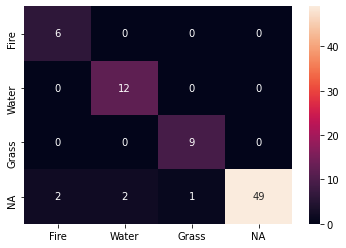

In [23]:


conf_mat = pd.DataFrame(confusion_matrix(Y_true, Y_pred),
                        index=["Fire", "Water", "Grass", "NA"],
                        columns=["Fire", "Water", "Grass", "NA"])
sn.heatmap(conf_mat, annot=True)


### Observations <a name="obs2">

We were able to obtain an accuracy of about 95% as well as an F1 Score of 97%, which is fantastic. Looking at the confusion matrix, we can see very good testing accuracy with select few misclassifications. Let's popoulate the observations table:
    
| Model | Observations | Accuracy | F1 |
|:----- |:------------| :--------| :--- |
|Logistic Regression (Binary) | Fairly high accuracy, many false positives in the confusion matrix | 90% |60% |
| Logistic Regression (Multi-class)| Very high accuracy, very few misclassifications |95%| 97% |
     
    
---

## $\mathcal{Fin}$

<img src="images/umaru.png" alt="cannot display image" style="width=700px">